In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [84]:
data = pd.read_csv("subset_dataset_frunza_roxana.csv")

In [85]:
data.head()

,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,SalePrice
0,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,145000
1,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,178000
2,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,NaN,0.0,85000
3,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,175000
4,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,127000


In [86]:
data.shape

(1168, 13)

In [87]:
numeric_data = data.select_dtypes(include=['number'])

In [88]:
numeric_data.head()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,SalePrice
0,5,6,1957,1957,0.0,145000
1,6,7,1993,1994,0.0,178000
2,5,7,1910,1950,0.0,85000
3,5,7,1937,1950,252.0,175000
4,5,6,1924,1950,0.0,127000


In [89]:
numeric_data.isna()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,SalePrice
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1163,False,False,False,False,False,False
1164,False,False,False,False,False,False
1165,False,False,False,False,False,False
1166,False,False,False,False,False,False


In [90]:
numeric_data.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1163    False
1164    False
1165    False
1166    False
1167    False
Length: 1168, dtype: bool

In [91]:
numeric_data.isna().any(axis=1).sum()

6

In [92]:
numeric_data.dropna(axis=0)

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,SalePrice
0,5,6,1957,1957,0.0,145000
1,6,7,1993,1994,0.0,178000
2,5,7,1910,1950,0.0,85000
3,5,7,1937,1950,252.0,175000
4,5,6,1924,1950,0.0,127000
...,...,...,...,...,...,...
1163,6,5,2006,2006,0.0,176432
1164,4,3,1928,1950,0.0,135000
1165,5,7,1955,1990,0.0,115000
1166,7,8,1918,1998,0.0,189950


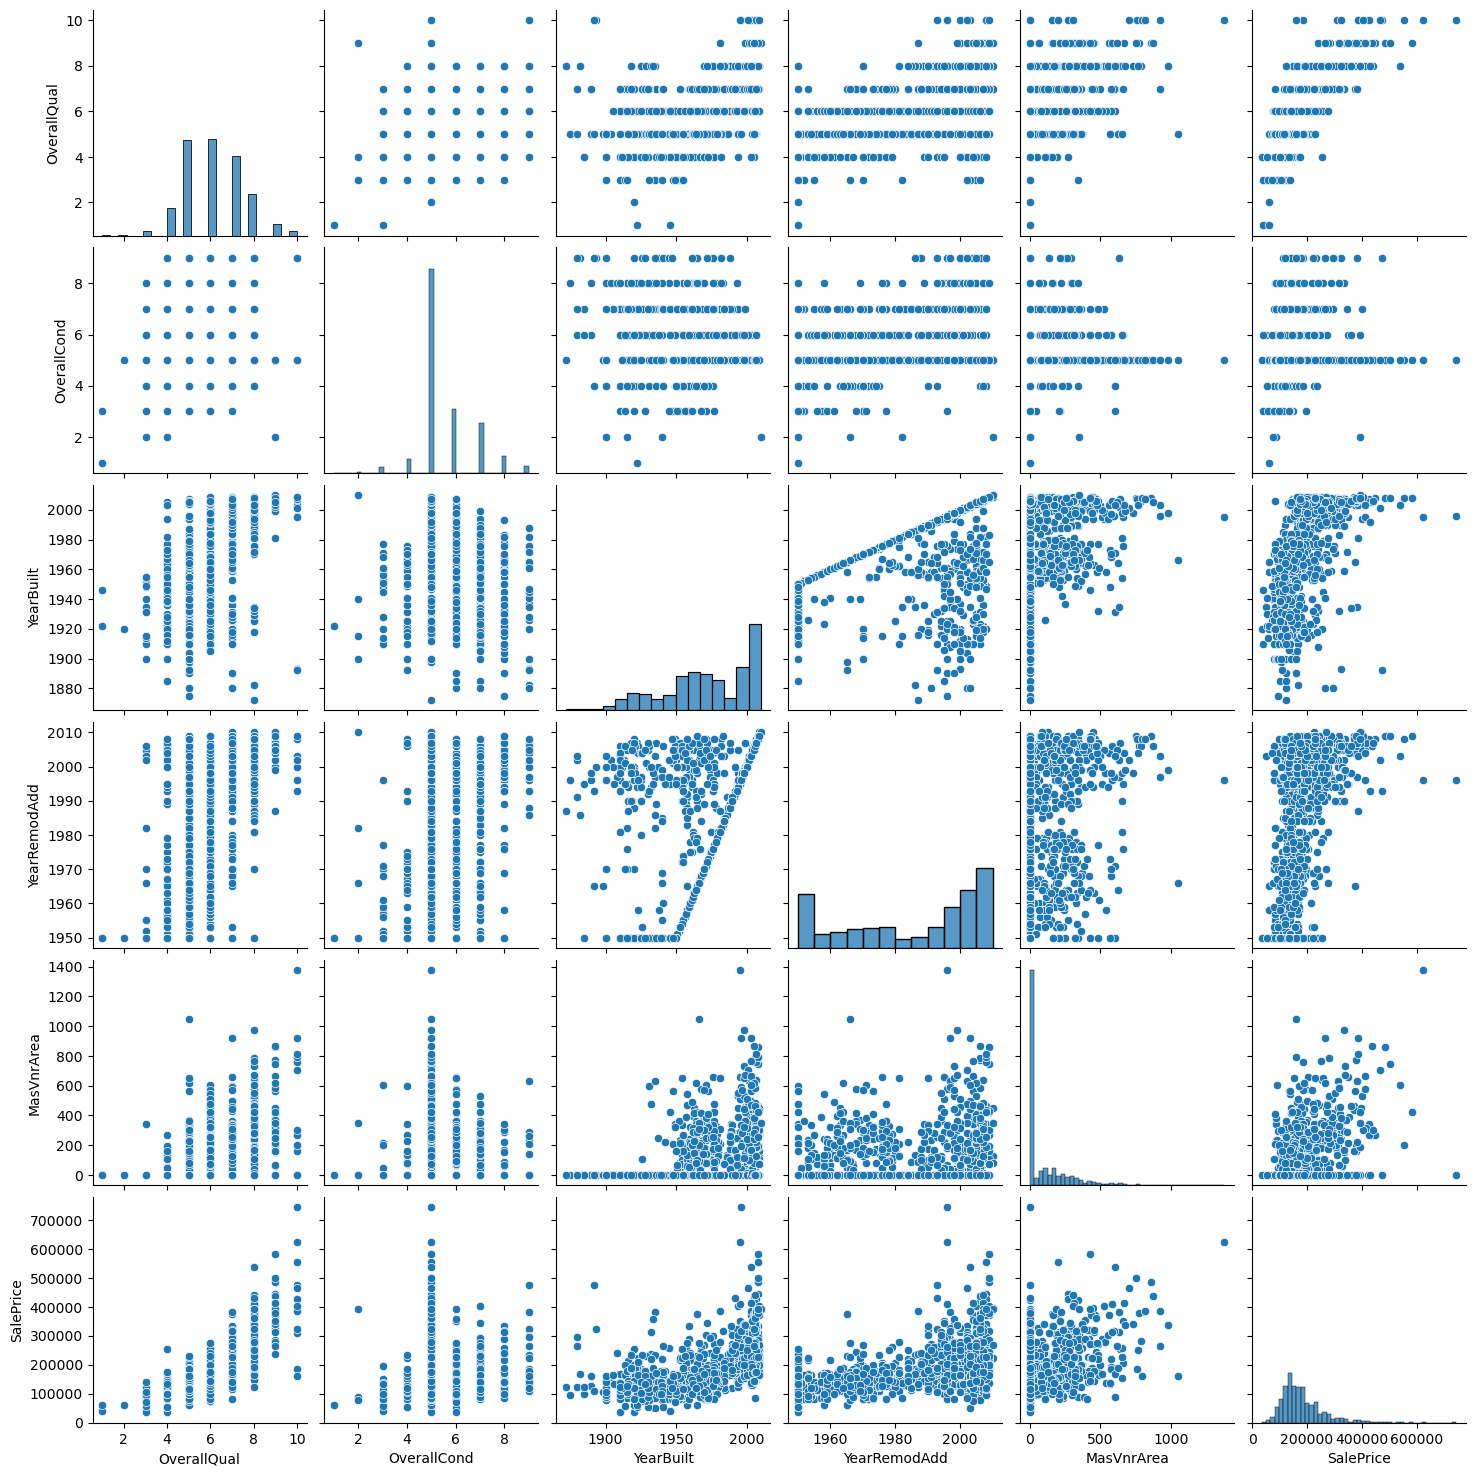

In [93]:
sns.pairplot(numeric_data)
plt.show()

    Is the assumption of linearity met?

OverallQual and SalePrice = roughly linear and positive (as quality increases, price increases in a straight trend)

YearBuilt/YearRemodAdd and SalePrice = some positive trend, but not perfectly linear

MasVnrArea and SalePrice = a weak positive relationship, not a strong linear trend.

    OVERALL QUAL AND SALEPRICE    

In [94]:
model_data = data[['OverallQual', 'SalePrice']]
formula = "SalePrice ~ OverallQual"
model = smf.ols(formula=formula, data=model_data).fit()
fitted_model = smf.ols(formula='SalePrice ~ OverallQual', data=model_data).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1879.
Date:                Tue, 14 Oct 2025   Prob (F-statistic):          2.60e-245
Time:                        21:10:53   Log-Likelihood:                -14242.
No. Observations:                1168   AIC:                         2.849e+04
Df Residuals:                    1166   BIC:                         2.850e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.023e+04   6421.492    -14.052      0.000   -1.03e+05   -7.76e+04
OverallQual  4.438e+04   1023.777     43.349      0.000    4.24e+04    4.64e+04
==============================================================================
Omnibus:                      396.196   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3000.603
Skew:                           1.358   Prob(JB):                         0.00
Kurtosis:                      10.368   Cond. No.                         29.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    What is the y-intercept? 
The y-intercept is -90,230. 

    What is the slope? 
The slope is 44,380.

    What linear equation would you write to express the relationship between sales and radio promotion budget? Use the form of y = slope * x + y-intercept? 
SalePrice = 44,380 × OverallQual − 90,230

    What does the slope mean in this context?
Higher quality homes are predicted to sell for significantly higher prices.

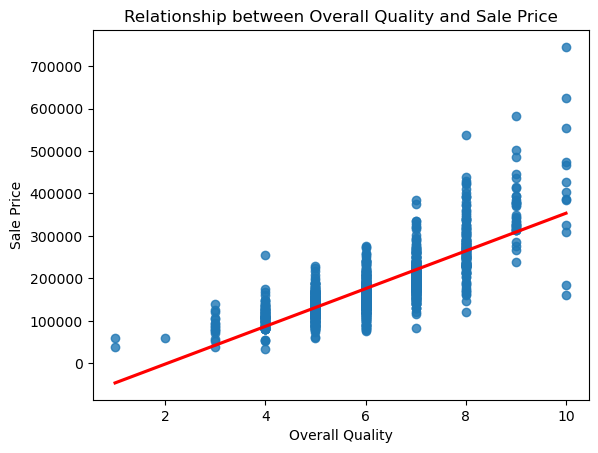

In [95]:
sns.regplot(
    x='OverallQual',
    y='SalePrice',
    data=model_data,
    ci=None,
    line_kws={'color': 'red'}
)

plt.title('Relationship between Overall Quality and Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

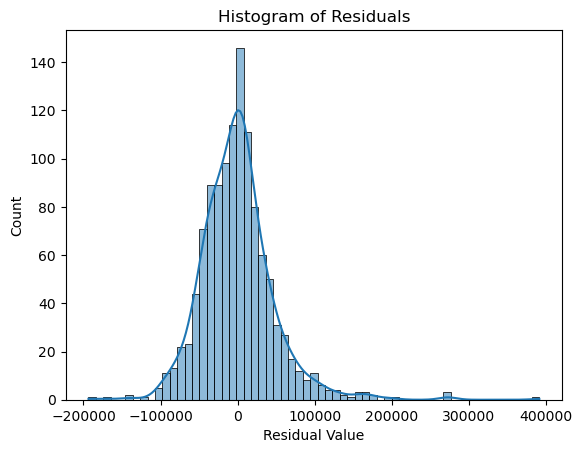

In [96]:
residuals = fitted_model.resid
fig = sns.histplot(residuals, kde=True)
fig.set_xlabel("Residual Value")
fig.set_ylabel("Count")
fig.set_title("Histogram of Residuals")
plt.show()

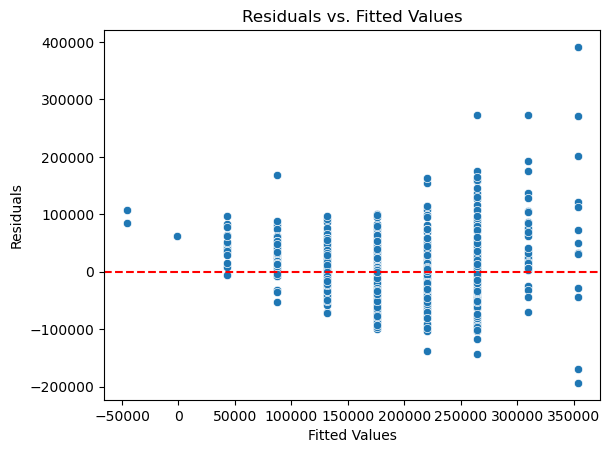

In [97]:
fitted_values = fitted_model.predict(model_data['OverallQual'])
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

    What do you observe from the preceding regression plot?
The scatterplot of OverallQual and SalePrice shows a clear positive linear relationship.

    Based on the visualization, what do you observe about the distribution of the residuals?
The histogram of residuals looks roughly bell shaped and centered around zero, which indicates that the residuals are mostly normally distributed.

    Is the assumption of normality met?
Since the residuals are mostly symmetric and centered near zero, the assumption of normality is approximately met.

    Are the assumptions of independent observation and homoscedasticity met?
In the residuals vs. fitted values plot, the residuals are spread fairly evenly around zero, without a clear pattern or curve.
This suggests that the independence assumption is met.


    YEARBUILT AND SALEPRICE

In [98]:
model_data = data[['YearBuilt', 'SalePrice']]
formula = 'SalePrice ~ YearBuilt'
fitted_model = smf.ols(formula=formula, data=model_data).fit()
print(fitted_model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     424.2
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           1.23e-80
Time:                        21:10:53   Log-Likelihood:                -14621.
No. Observations:                1168   AIC:                         2.925e+04
Df Residuals:                    1166   BIC:                         2.926e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.383e+06   1.25e+05    -19.137      0.0

    What is the y-intercept? 
The y-intercept is -2,383,000

    What is the slope? 
The slope is 1,300.93.

    What linear equation would you write to express the relationship between sales and radio promotion budget? Use the form of y = slope * x + y-intercept?
SalePrice = 1,300.93 X YearBuilt − 2,383,000​

    What does the slope mean in this context?
Newer houses tend to sell for more


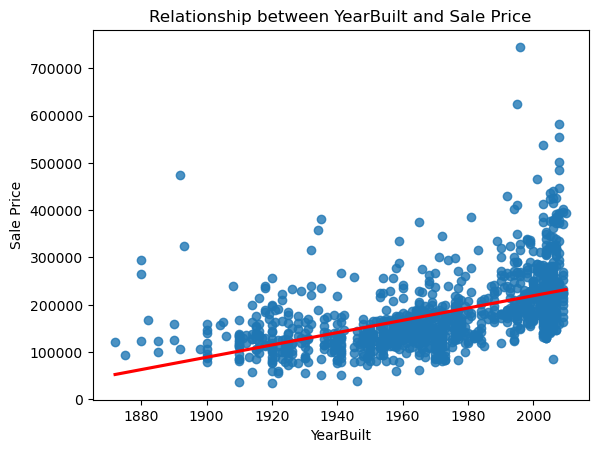

In [99]:
sns.regplot(
    x='YearBuilt',
    y='SalePrice',
    data=model_data,
    ci=None,
    line_kws={'color': 'red'}
)

plt.title('Relationship between YearBuilt and Sale Price')
plt.xlabel('YearBuilt')
plt.ylabel('Sale Price')
plt.show()

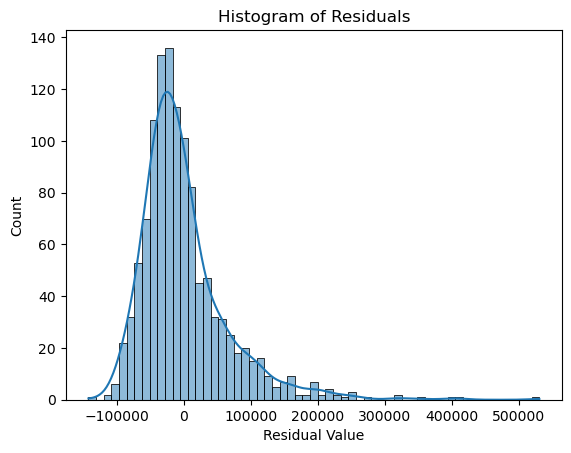

In [100]:
residuals = fitted_model.resid
fig = sns.histplot(residuals, kde=True)
fig.set_xlabel("Residual Value")
fig.set_ylabel("Count")
fig.set_title("Histogram of Residuals")
plt.show()

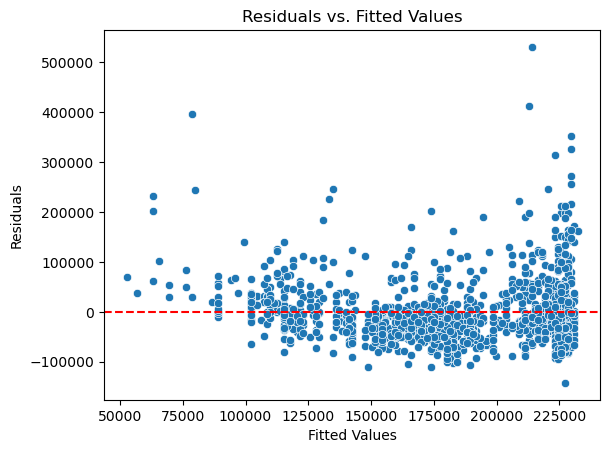

In [101]:
fitted_values = fitted_model.predict(model_data['YearBuilt'])
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

    What do you observe from the preceding regression plot?
The regression plot shows a positive linear relationship between YearBuilt and SalePrice.

    Based on the visualization, what do you observe about the distribution of the residuals?
The histogram of residuals shows that the residuals are right-skewed (not symmetric around zero).

    Is the assumption of normality met?
The residuals are not perfectly normally distributed, as indicated by the skewness in the histogram. The normality assumption is not fully met.

    Are the assumptions of independent observation and homoscedasticity met?
The residuals vs. fitted values plot shows that the residuals are not randomly scattered, the spread tends to increase with fitted values.



    MASVNRAREA AND SALEPRICE

In [102]:
model_data = data[['MasVnrArea', 'SalePrice']]
formula = 'SalePrice ~ MasVnrArea'
fitted_model = smf.ols(formula=formula, data=model_data).fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     309.8
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           1.19e-61
Time:                        21:10:54   Log-Likelihood:                -14592.
No. Observations:                1162   AIC:                         2.919e+04
Df Residuals:                    1160   BIC:                         2.920e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.6e+05   2354.372     67.959      0.0

    What is the y-intercept? 
The y-intercept is 160,000.

    What is the slope? 
The slope is 205.46.

    What linear equation would you write to express the relationship between sales and radio promotion budget? Use the form of y = slope * x + y-intercept? 
SalePrice = 205.46 × MasVnrArea + 160,000

    What does the slope mean in this context?
The slope means that houses with more masonry veneer area tend to sell for higher prices.


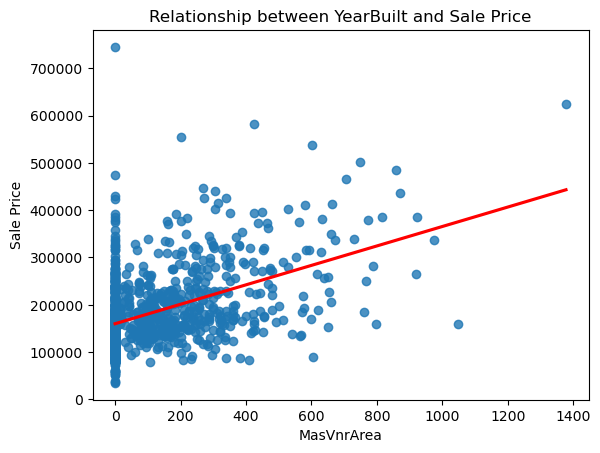

In [103]:
sns.regplot(
    x='MasVnrArea',
    y='SalePrice',
    data=model_data,
    ci=None,
    line_kws={'color': 'red'}
)

plt.title('Relationship between YearBuilt and Sale Price')
plt.xlabel('MasVnrArea')
plt.ylabel('Sale Price')
plt.show()

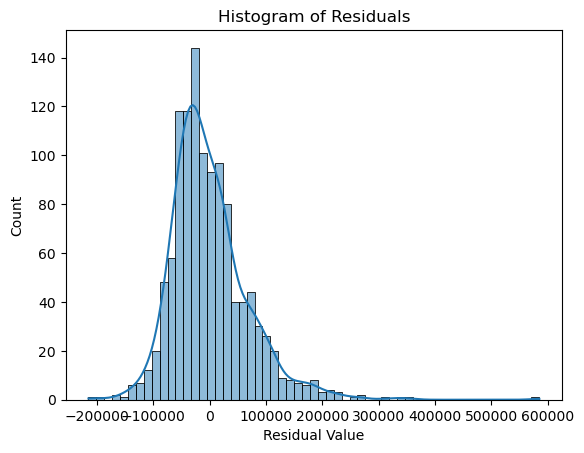

In [104]:
residuals = fitted_model.resid
fig = sns.histplot(residuals, kde=True)
fig.set_xlabel("Residual Value")
fig.set_ylabel("Count")
fig.set_title("Histogram of Residuals")
plt.show()

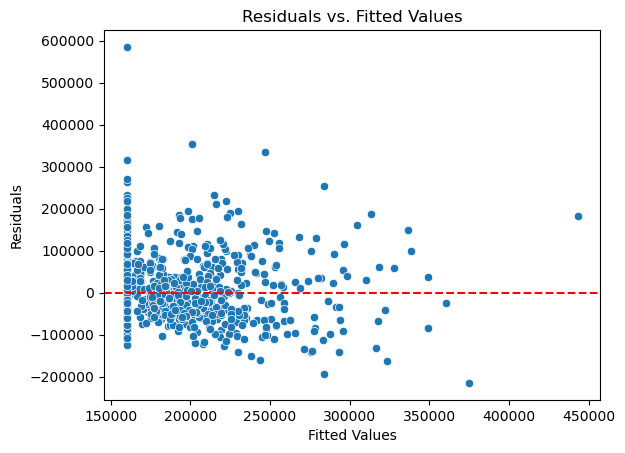

In [105]:
fitted_values = fitted_model.predict(model_data['MasVnrArea'])
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

    What do you observe from the preceding regression plot?
The regression plot shows a positive linear relationship between MasVnrArea and SalePrice.

    Based on the visualization, what do you observe about the distribution of the residuals?
The histogram of residuals shows a right-skewed distribution, meaning most residuals are close to zero, but there are a few large positive residuals.

    Is the assumption of normality met?
The residuals are not perfectly normally distributed.

    Are the assumptions of independent observation and homoscedasticity met?
The residuals vs. fitted values plot shows that the spread of residuals increases as fitted values rise(larger prediction errors for higher sale prices)

    YEARREMODADD AND SALEPRICE

In [106]:
model_data = data[['YearRemodAdd', 'SalePrice']]
formula = 'SalePrice ~ YearRemodAdd'
fitted_model = smf.ols(formula=formula, data=model_data).fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     406.8
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           7.57e-78
Time:                        21:10:55   Log-Likelihood:                -14628.
No. Observations:                1168   AIC:                         2.926e+04
Df Residuals:                    1166   BIC:                         2.927e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -3.58e+06   1.87e+05    -19.196   

    What is the y-intercept? 
The y-intercept is −3,580,000

    What is the slope? 
The slope is 1,895.23.

    What linear equation would you write to express the relationship between sales and radio promotion budget? Use the form of y = slope * x + y-intercept? 
SalePrice = 1,895.23 × YearRemodAdd − 3,580,000

    What does the slope mean in this context?
The slope tells us that newer renovations or remodels are associated with higher sale prices.


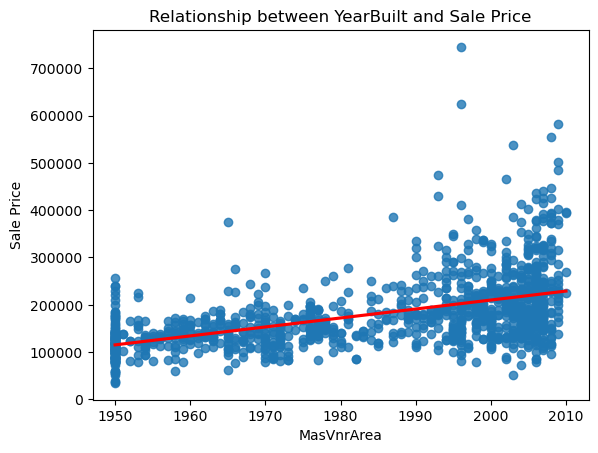

In [107]:
sns.regplot(
    x='YearRemodAdd',
    y='SalePrice',
    data=model_data,
    ci=None,
    line_kws={'color': 'red'}
)

plt.title('Relationship between YearBuilt and Sale Price')
plt.xlabel('MasVnrArea')
plt.ylabel('Sale Price')
plt.show()

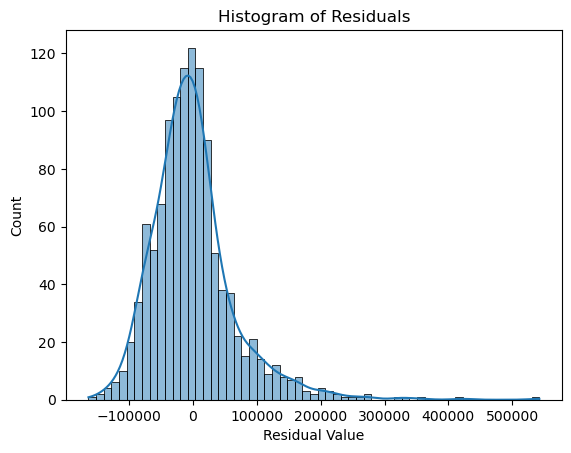

In [108]:
residuals = fitted_model.resid
fig = sns.histplot(residuals, kde=True)
fig.set_xlabel("Residual Value")
fig.set_ylabel("Count")
fig.set_title("Histogram of Residuals")
plt.show()

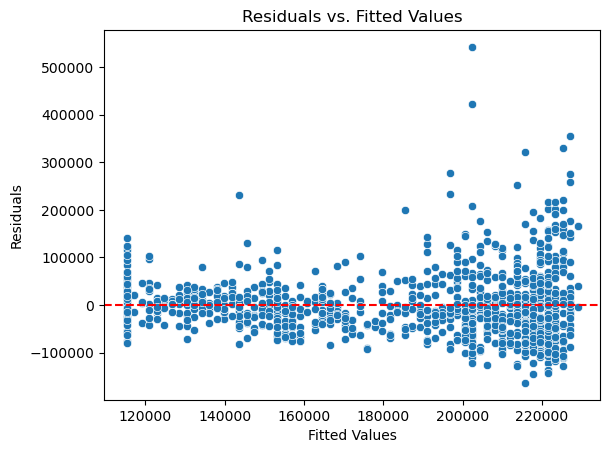

In [109]:
fitted_values = fitted_model.predict(model_data['YearRemodAdd'])
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

    What do you observe from the preceding regression plot?
The regression plot shows a positive relationship between YearBuilt and SalePrice.

    Based on the visualization, what do you observe about the distribution of the residuals?
The histogram of residuals shows that the residuals are roughly bell-shaped, but slightly skewed to the right.

    Is the assumption of normality met?
The assumption of normality is partially met.

    Are the assumptions of independent observation and homoscedasticity met?
The residuals vs. fitted values plot shows a shaped pattern, where the spread of residuals increases with fitted values. 

